## The goal is to take our .fif file and read it as an array and save it as a numpy

In [1]:
import numpy as np
import mne
%matplotlib inline
import matplotlib.pyplot as plt
import scipy 
from scipy.stats import hmean,trim_mean
import pandas as pd

In [20]:
raw = mne.io.read_raw_fif("suj28_l2nap_day1.fif")
print(raw.info)
print(raw.ch_names)

Opening raw data file C:\Users\Sammauel\Documents\csc59969\EEG\EEG-Visualization\Inspection\suj28_l2nap_day1.fif...
This filename (C:\Users\Sammauel\Documents\csc59969\EEG\EEG-Visualization\Inspection\suj28_l2nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61)  idle
    Range : 0 ... 1807649 =      0.000 ...  1807.649 secs
Ready.
add_eeg_ref defaults to True in 0.13, will default to False in 0.14, and will be removed in 0.15. We recommend to use add_eeg_ref=False and set_eeg_reference() instead.
<Info | 19 non-empty fields
    bads : 'list | 0 items
    buffer_size_sec : 'numpy.float64 | 1.0
    ch_names : 'list | Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, CP5
    chs : 'list | 63 items (EEG: 61, EOG: 2)
    comps : 'list | 0 items
    custom_ref_applied : 'bool | False
    dev

<ipython-input-20-4f9546b8506b>:1: RuntimeWarning: This filename (C:\Users\Sammauel\Documents\csc59969\EEG\EEG-Visualization\Inspection\suj28_l2nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw = mne.io.read_raw_fif("suj28_l2nap_day1.fif")
<ipython-input-20-4f9546b8506b>:1: DeprecationWarning: add_eeg_ref defaults to True in 0.13, will default to False in 0.14, and will be removed in 0.15. We recommend to use add_eeg_ref=False and set_eeg_reference() instead.
  raw = mne.io.read_raw_fif("suj28_l2nap_day1.fif")


In [33]:
# Run this command first to look at the data at 10 ms

#raw = mne.io.read_raw_fif("suj28_l2nap_day1.fif",preload = True)
#raw.load_data
#raw.resample(100)

In [45]:
df = raw.to_data_frame(picks=None, index=None, scale_time=1000.0, scalings=dict(eeg=1), copy=True, start=None, stop=None)
df.head()

Converting time column to int64...


signal,Fp1,Fz,F3,F7,FT9,FC5,FC1,C3,T7,CP5,...,CP4,TP8,C6,C2,FC4,FT8,F6,F2,LOc,ROc
time,,,,,,,,,,,,,,,,,,,,,
0,11607.189936,14893.280850,15708.377604,1512.585225,6591.296067,-898.787251,18075.431582,16503.607833,13248.552848,14890.099683,...,16981.732797,3983.475638,21690.807722,6378.633979,17877.619873,1655.989342,-1911.685458,16699.364974,2.392143e+10,7.073098e+09
100,11555.578653,15299.300894,15693.479940,1436.988655,6829.300896,-1011.861941,18168.177774,16772.396012,13415.294053,14701.752851,...,17048.662575,3809.184469,21818.078421,6353.064430,18072.641849,1576.326706,-1874.566798,16210.705241,2.386367e+10,7.010113e+09
200,11540.766520,15416.880237,15683.965824,1412.987570,6884.302009,-1041.261801,18190.168586,16843.484548,13460.361477,14651.672472,...,17063.569609,3765.031605,21847.284388,6344.277508,18118.784003,1554.908005,-1870.197107,16095.181204,2.380634e+10,6.937458e+09
300,11512.506610,15604.173968,15673.798529,1376.670943,7001.180145,-1100.937336,18231.458615,16965.471244,13537.960218,14555.517641,...,17094.423257,3671.677613,21905.517271,6329.353178,18212.366861,1512.629428,-1858.585829,15858.023247,2.377906e+10,6.882754e+09
400,11517.604170,15520.944267,15677.104511,1387.739775,6962.857434,-1087.945724,18217.714150,16920.458397,13501.012309,14584.542714,...,17081.147297,3694.949214,21884.120521,6331.899204,18181.946706,1522.776348,-1860.484833,15916.993788,2.380877e+10,6.898872e+09


In [47]:
#df.drop(['LOc'],inplace=True,axis=1)
#df.drop(['ROc'],inplace=True,axis=1)
df.head()

signal,Fp1,Fz,F3,F7,FT9,FC5,FC1,C3,T7,CP5,...,P2,CPz,CP4,TP8,C6,C2,FC4,FT8,F6,F2
time,,,,,,,,,,,,,,,,,,,,,
0,11607.189936,14893.280850,15708.377604,1512.585225,6591.296067,-898.787251,18075.431582,16503.607833,13248.552848,14890.099683,...,19619.810818,20210.998224,16981.732797,3983.475638,21690.807722,6378.633979,17877.619873,1655.989342,-1911.685458,16699.364974
100,11555.578653,15299.300894,15693.479940,1436.988655,6829.300896,-1011.861941,18168.177774,16772.396012,13415.294053,14701.752851,...,19748.022261,20310.568130,17048.662575,3809.184469,21818.078421,6353.064430,18072.641849,1576.326706,-1874.566798,16210.705241
200,11540.766520,15416.880237,15683.965824,1412.987570,6884.302009,-1041.261801,18190.168586,16843.484548,13460.361477,14651.672472,...,19777.992983,20333.166334,17063.569609,3765.031605,21847.284388,6344.277508,18118.784003,1554.908005,-1870.197107,16095.181204
300,11512.506610,15604.173968,15673.798529,1376.670943,7001.180145,-1100.937336,18231.458615,16965.471244,13537.960218,14555.517641,...,19839.064039,20381.218309,17094.423257,3671.677613,21905.517271,6329.353178,18212.366861,1512.629428,-1858.585829,15858.023247
400,11517.604170,15520.944267,15677.104511,1387.739775,6962.857434,-1087.945724,18217.714150,16920.458397,13501.012309,14584.542714,...,19815.927383,20364.087903,17081.147297,3694.949214,21884.120521,6331.899204,18181.946706,1522.776348,-1860.484833,15916.993788


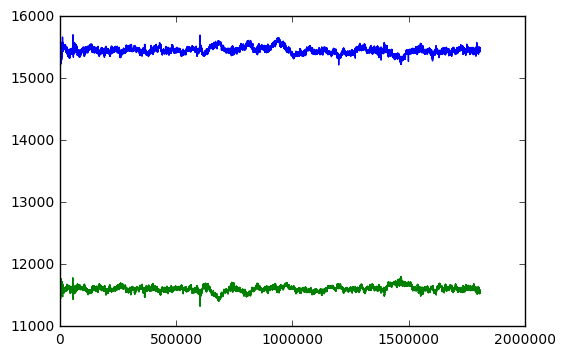

In [43]:
plt.plot(df1['time'],df1['C4'])
plt.plot(df1['time'],df1['Fp1'])

In [50]:
## To save this as csv run the following
df.to_csv("suj28_l2nap_day1_100ms.csv")
df2 = pd.read_csv("suj28_l2nap_day1_100ms.csv")
df2.head()

,time,Fp1,Fz,F3,F7,FT9,FC5,FC1,C3,T7,...,P2,CPz,CP4,TP8,C6,C2,FC4,FT8,F6,F2
0,0,11607.189936,14893.280850,15708.377604,1512.585225,6591.296067,-898.787251,18075.431582,16503.607833,13248.552848,...,19619.810818,20210.998224,16981.732797,3983.475638,21690.807722,6378.633979,17877.619873,1655.989342,-1911.685458,16699.364974
1,100,11555.578653,15299.300894,15693.479940,1436.988655,6829.300896,-1011.861941,18168.177774,16772.396012,13415.294053,...,19748.022261,20310.568130,17048.662575,3809.184469,21818.078421,6353.064430,18072.641849,1576.326706,-1874.566798,16210.705241
2,200,11540.766520,15416.880237,15683.965824,1412.987570,6884.302009,-1041.261801,18190.168586,16843.484548,13460.361477,...,19777.992983,20333.166334,17063.569609,3765.031605,21847.284388,6344.277508,18118.784003,1554.908005,-1870.197107,16095.181204
3,300,11512.506610,15604.173968,15673.798529,1376.670943,7001.180145,-1100.937336,18231.458615,16965.471244,13537.960218,...,19839.064039,20381.218309,17094.423257,3671.677613,21905.517271,6329.353178,18212.366861,1512.629428,-1858.585829,15858.023247
4,400,11517.604170,15520.944267,15677.104511,1387.739775,6962.857434,-1087.945724,18217.714150,16920.458397,13501.012309,...,19815.927383,20364.087903,17081.147297,3694.949214,21884.120521,6331.899204,18181.946706,1522.776348,-1860.484833,15916.993788


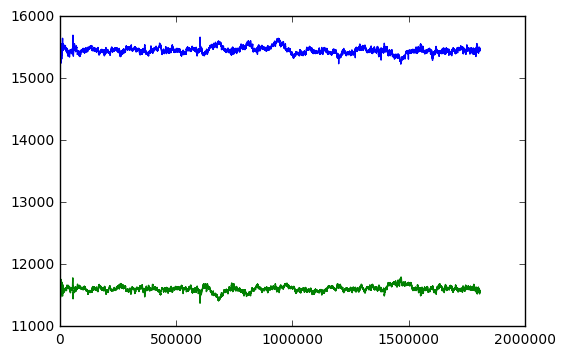

In [54]:
plt.plot(df2['time'],df2['C4'])
plt.plot(df1['time'],df1['Fp1'])

In [44]:
raw = mne.io.read_raw_fif("suj28_l2nap_day1.fif",preload = True)
raw.load_data
raw.resample(10)

Opening raw data file C:\Users\Sammauel\Documents\csc59969\EEG\EEG-Visualization\Inspection\suj28_l2nap_day1.fif...
This filename (C:\Users\Sammauel\Documents\csc59969\EEG\EEG-Visualization\Inspection\suj28_l2nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


<ipython-input-44-1e425b8fd88d>:1: RuntimeWarning: This filename (C:\Users\Sammauel\Documents\csc59969\EEG\EEG-Visualization\Inspection\suj28_l2nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw = mne.io.read_raw_fif("suj28_l2nap_day1.fif",preload = True)


Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61)  idle
    Range : 0 ... 1807649 =      0.000 ...  1807.649 secs
Ready.
add_eeg_ref defaults to True in 0.13, will default to False in 0.14, and will be removed in 0.15. We recommend to use add_eeg_ref=False and set_eeg_reference() instead.
Reading 0 ... 1807649  =      0.000 ...  1807.649 secs...


<ipython-input-44-1e425b8fd88d>:1: DeprecationWarning: add_eeg_ref defaults to True in 0.13, will default to False in 0.14, and will be removed in 0.15. We recommend to use add_eeg_ref=False and set_eeg_reference() instead.
  raw = mne.io.read_raw_fif("suj28_l2nap_day1.fif",preload = True)


<Raw  |  suj28_l2nap_day1.fif, n_channels x n_times : 63 x 18076 (1807.5 sec), ~8.8 MB, data loaded>

In [10]:
data,time = raw[:,:]
print(data.shape)

(63, 180765)


In [108]:
# Wanted to know if numpy was responsive at all.
#np.savetxt('test.txt', data)

In [112]:
#np.save('test.npy', data)

In [5]:
testing = np.load('test.npy')
testing[:,:]

array([[ 11610.66308594,  11609.3828125 ,  11608.01855469, ...,
         11579.25585938,  11579.37597656,  11579.50292969],
       [ 14855.59960938,  14861.58203125,  14867.65039062, ...,
         15304.23144531,  15305.53027344,  15306.84570312],
       [ 15713.27636719,  15712.25097656,  15711.18066406, ...,
         15786.72558594,  15786.75292969,  15786.77832031],
       ..., 
       [ 16730.83007812,  16723.89648438,  16716.5078125 , ...,
         16120.19921875,  16119.87988281,  16119.61328125],
       [ 23940.18554688,  23927.19726562,  23912.20703125, ...,
         22154.19921875,  22153.07617188,  22154.05273438],
       [  7116.6015625 ,   7111.47460938,   7102.09960938, ...,
         15061.76757812,  15061.47460938,  15061.76757812]])

In [11]:
start, stop = raw.time_as_index([0,1800000]) # 0 to 30 min
data,times = raw[:63, start:stop]
print(data.shape)
print(times.shape)
print(times.min(), times.max())

(63, 180765)
(180765,)
0.0 1807.64


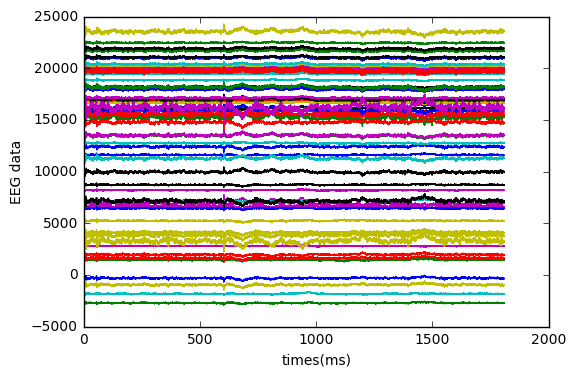

In [12]:
picks = mne.pick_types(raw.info, eeg=True)
data,times = raw[picks[:61], start:stop]

plt.plot(times, data.T)
plt.xlabel('times(ms)')
plt.ylabel('EEG data')
plt.show()

#### Convert the infomation into binaray file or json

14867.650390625